# Importing Libraries

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Reading Dataset


In [12]:
data = pd.read_csv("/content/drive/MyDrive/APR/Titanic-Dataset.csv")
print(data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


# Preprocessing Data

In [13]:
# Fill missing Age with median
data['Age'].fillna(data['Age'].median(), inplace=True)

# Fill missing Embarked with most common value
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Drop Cabin (too many missing values)
data.drop(columns=['Cabin', 'Ticket', 'Name'], inplace=True)


/tmp/ipython-input-2200205963.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
/tmp/ipython-input-2200205963.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

Encode labels

In [14]:
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Define Features and target

In [15]:
X = data.drop('Survived', axis=1)
y = data['Survived']

# Training Model

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)


LogisticRegression(max_iter=500)

# Predictions and Evaluations

In [22]:
# Training predictions
y_train_pred = model.predict(X_train)

# Testing predictions
y_test_pred = model.predict(X_test)

# Training Accuracy & Error
train_accuracy = accuracy_score(y_train, y_train_pred)
train_error = 1 - train_accuracy

# Testing Accuracy & Error
test_accuracy = accuracy_score(y_test, y_test_pred)
test_error = 1 - test_accuracy

print("Training Accuracy:", train_accuracy)
print("Training Error:", train_error)
print("Testing Accuracy:", test_accuracy)
print("Testing Error:", test_error)



Training Accuracy: 0.8061797752808989
Training Error: 0.1938202247191011
Testing Accuracy: 0.7988826815642458
Testing Error: 0.2011173184357542


Accuracy: 0.7988826815642458


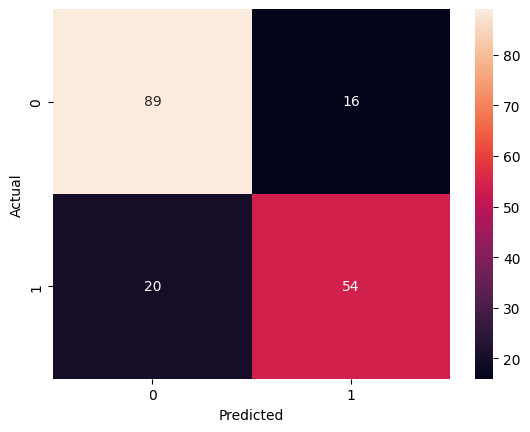


Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [18]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print("\nClassification Report:\n", classification_report(y_test, y_pred))

